#Project Overview
I will be analyzing Spotify data from a dataset on [kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db). This dataset was made using Spotify's web API. This Dataset has many variables that describe the songs such as popularity,genre,duration, key, mode, time signature,acoustiness,danceablity,energy,instumentalness,liveness,speechiness,valence,and tempo. These variables will be described in further detail later. The goal of the project is to see what features affect the popularity of a song on spotify. This information would be useful for a music producer or artist who wants to see how to make a hit song.

In [31]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
from matplotlib import pyplot as plt # for plotting
import matplotlib.pyplot as plt # for plotting
spotify = pd.read_csv("/content/SpotifyFeatures 2.csv")

In [6]:
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


#Data Cleaning

The major steps of data cleaning for this project was 


1.   Getting rid of the small number of datapoints that had a time signature listed as 0/4. This does not exist in music and I'm assuming this was a typo from the dataset
2.   Converting the variables that should be numeric from strings
3.   Changing the duration variable from milliseconds to minutes so it will be easier to interpret
4.   Getting rid of any duplicate songs by using the track_id variable.
5.   Getting rid of any rows that have NA values
6.   Fixing error where there were two seperate generes counted as "Children's genre" (one has the "" the other did not)

After data cleaning was complete, the data set has 176,786 songs (rows) and 18 columns.





In [7]:
#A time signature of "0/4" was included in a very small amount of the dataset. I believe this was a mistake from the dataset because this time signature does not exist
spotify = spotify[spotify.time_signature != "0/4"]
#Everything in the dataset was a string at first, converting the strings to numeric so the data can be used in models.
spotify.popularity = pd.to_numeric(spotify.popularity, errors='coerce')
spotify.acousticness = pd.to_numeric(spotify.acousticness, errors='coerce')
spotify.danceability = pd.to_numeric(spotify.danceability, errors='coerce')
spotify.duration_ms = pd.to_numeric(spotify.duration_ms, errors='coerce')
spotify.energy = pd.to_numeric(spotify.energy, errors='coerce')
spotify.instrumentalness = pd.to_numeric(spotify.instrumentalness, errors='coerce')
spotify.liveness = pd.to_numeric(spotify.liveness, errors='coerce')
spotify.loudness = pd.to_numeric(spotify.loudness, errors='coerce')
spotify.speechiness = pd.to_numeric(spotify.speechiness, errors='coerce')
spotify.tempo = pd.to_numeric(spotify.tempo, errors='coerce')
spotify.valence = pd.to_numeric(spotify.valence, errors='coerce')
#Duration variable was given in milliseconds I will convert the value to minutes so it will be easier to understand
spotify.loc[:,'duration_ms'] *= 1/60000 
pd.isnull(spotify).sum()
#Getting rid of duplicate and missing data
spotify = spotify.drop_duplicates(subset=['track_id'], keep='first')
spotify = spotify.dropna()

In [8]:
spotify['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [9]:
#Children's music is listed twice. The code below will rename the second childrens music to the first one
spotify['genre'] = spotify['genre'].replace({"Children's Music": 'Children’s Music'})

In [10]:
#Check for no repeating genres
spotify['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

In [11]:
print("Total number of songs:")
spotify.shape[0]

Total number of songs:


176768

In [12]:
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,1.656217,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,2.289550,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,2.837783,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,2.540450,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,1.377083,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


#Definition of Variables that will be used in analysis
Source for definitions, https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ 

genre = genre of music,there are a total of 26 genres in this dataset.It should be noted that there were some duplicate songs in the dataset because these songs were listed in two different genres. For Example, Ariana Grande's song "7 Rings" was listed as both pop and dance. For the sake of simplicity I deleted duplicates and just kept the one of the rows.

popularity = The response variable,the popularity of a track is a value between 0 and 100, with 100 being the most popular. Popularity is based mainly on the total number of playbacks.

acousticness = A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability = describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

duration_ms = Length of a song in minutes

energy = a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

instrumentalness = the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

key = the key the song is written in

liveness = Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

loudness = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

mode = the mode of the song,it is either major or minor

speechiness = detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo = The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

time signature = the beats per measure in a song

valence = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

#Variable Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


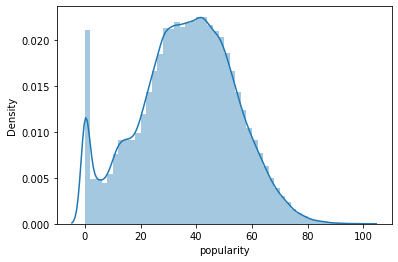

In [13]:
#This graph shows the distribution of the popularity variable in the dataset.
pop_dist = sns.distplot(spotify['popularity'])
display(pop_dist)

In [14]:
print('The average popularity is ' + str(spotify['popularity'].mean()))

The average popularity is 36.27337527154236


In [15]:
print('The popularity of the top 20% of songs is greater than or equal to ' + str(spotify["popularity"].quantile(.80)))

The popularity of the top 20% of songs is greater than or equal to 51.0


In [16]:
#The popularity of the top .3% of songs
spotify["popularity"].quantile(.997)

80.0

As you can see in the graph above the distribution is not normal (bell curved shape). There are more songs that have a popularity less than 50 than songs that have a popularity more than 50. The average popularity is about 36 and the top 20% of songs on spotify have a popularity of 51. Only the top .3% of songs in the dataset have a popularity greater than 80!

Next I will look to see how popularity correlates with the dependent variables that are numeric.

In this heat map variables that are dark blue are positively correlated with each other and variables that are dark red are negatively correlated with each other. A correlation with an absolute value greater than .8 means that the variables are highly correlated.

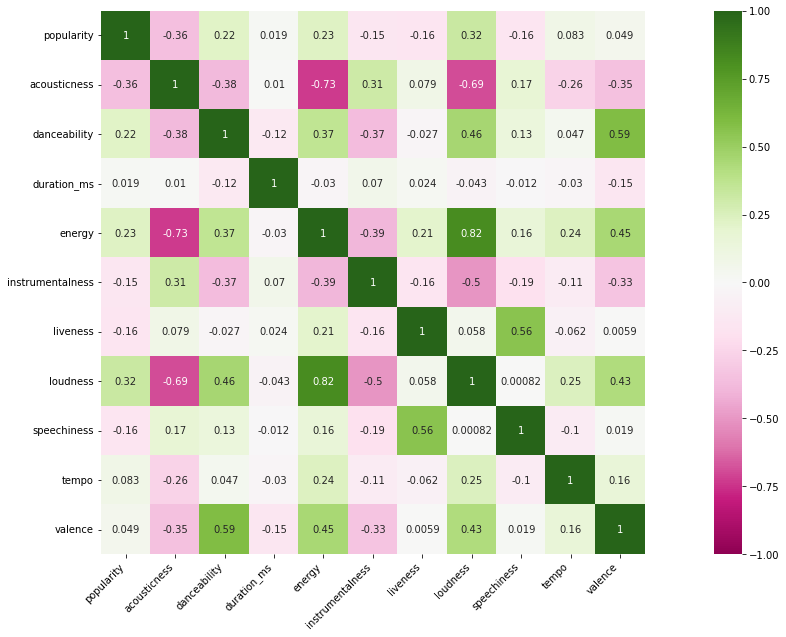

In [17]:
corr = spotify.corr()
plt.figure(figsize=(25,10))
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap="PiYG",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
display(ax)


None of the variables are strongly correlated with popularity. If they were strongly correlated they would have a value of either 0.8 or -0.8

The following variables are positively correlated with popularity:danceability,duration,energy,loudness,tempo,and valence (note:Duration and valence's correlation with popularity is only slightly about 0)

The following varialbe are negatively correlated with popularity:acousticness,instrumentalness,liveness,and speechiness

So it seems that people like to stream songs that are fast,happy,loud,and are easy to dance to.

For this project I will mostly be concerned with what variables are correlated to popularity. But is is interesting to note that acousticness and energy are highly negatively correlated. Loudness and acousticness are also highly negatively correlated. This makes sense though because acoustic songs are usually slow and not loud.

Next I will see how the none numeric response variables are related to popularity.

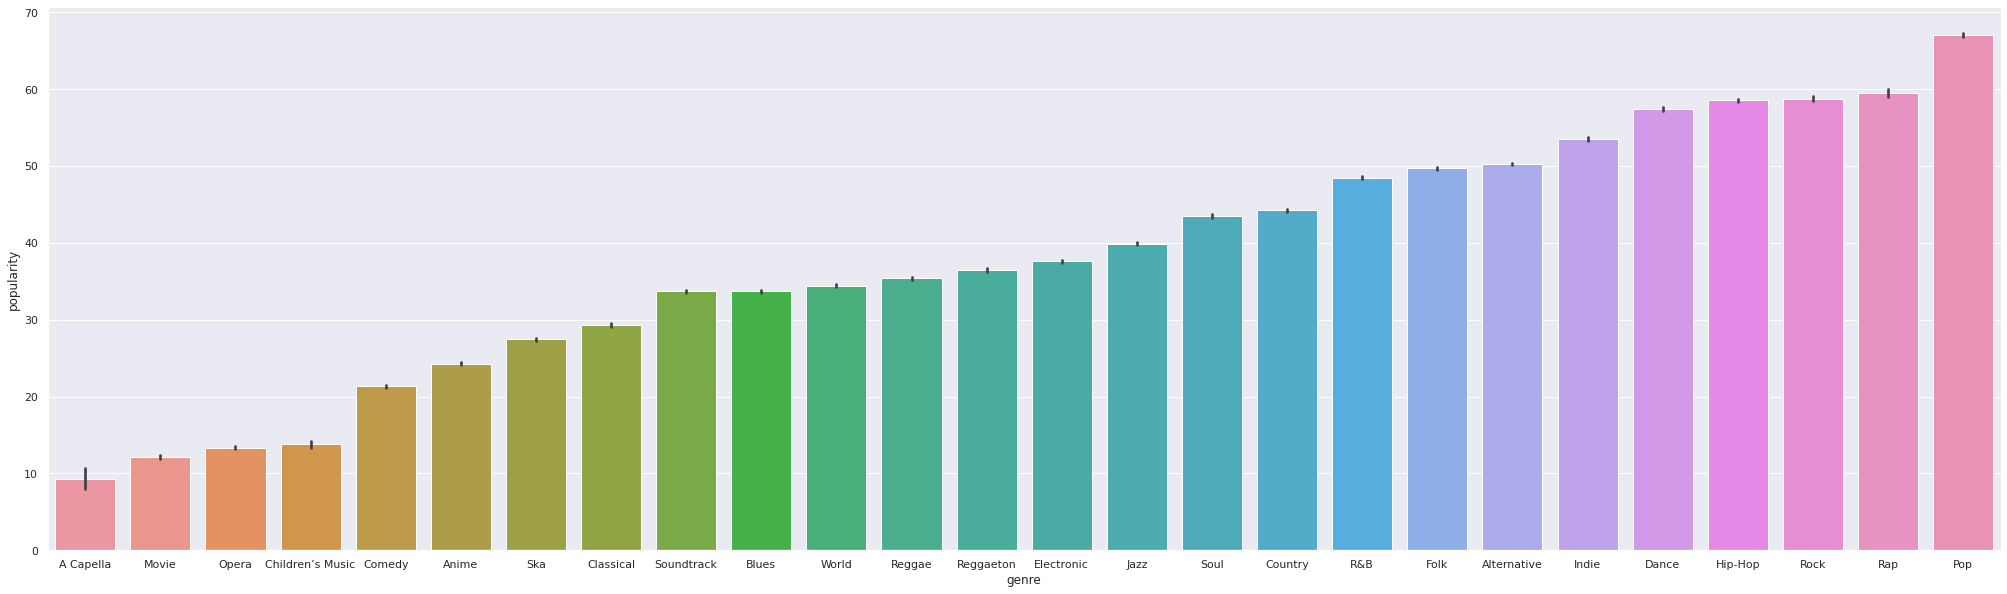

In [18]:
#This graph shows the mean popularity of each genre
sns.set(rc={'figure.figsize':(35,10)})
result = spotify.groupby(["genre"])['popularity'].aggregate(np.mean).reset_index().sort_values('popularity')
#result = result.drop(4)
plt = sns.barplot(x = 'genre', y = 'popularity',data = spotify,order=result['genre'])
display(plt)

The least popular genre is A Capella. The most popular genre is Pop, this should be no suprise considering considering that the variables that were positively correlated with popularity are most commonly seen in pop music.

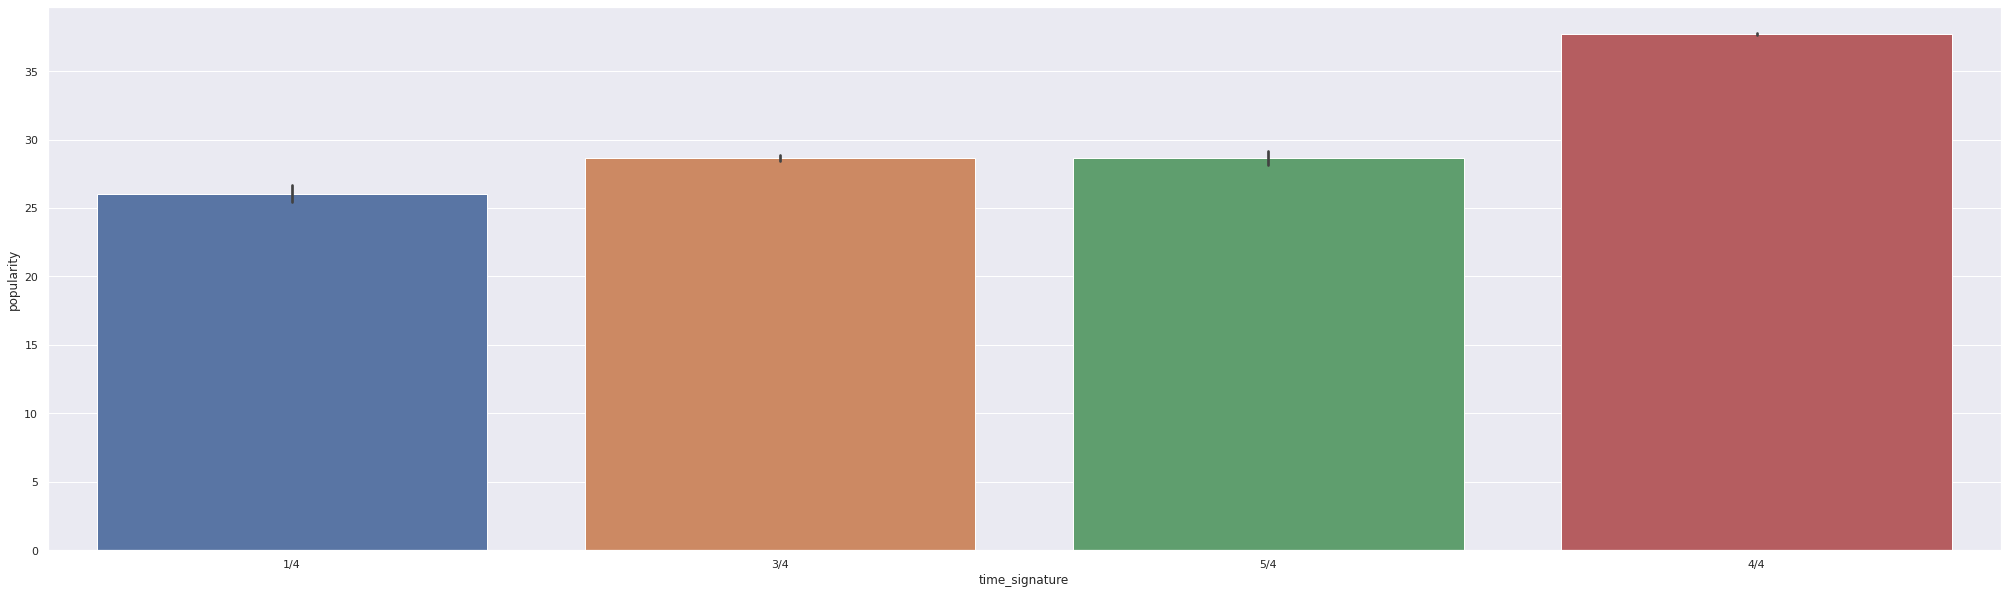

In [19]:
#The mean popularity of each time signature
result2 = spotify.groupby(["time_signature"])['popularity'].aggregate(np.mean).reset_index().sort_values('popularity')
pop_time_sig = sns.barplot(x = 'time_signature', y = 'popularity',order=result2['time_signature'], data = spotify)
display(pop_time_sig)

The mean popularity of 1/4, 5/4 and 3/4 are around the same but the popularity of songs with 4/4 time signature is about 6 points higher than the rest.

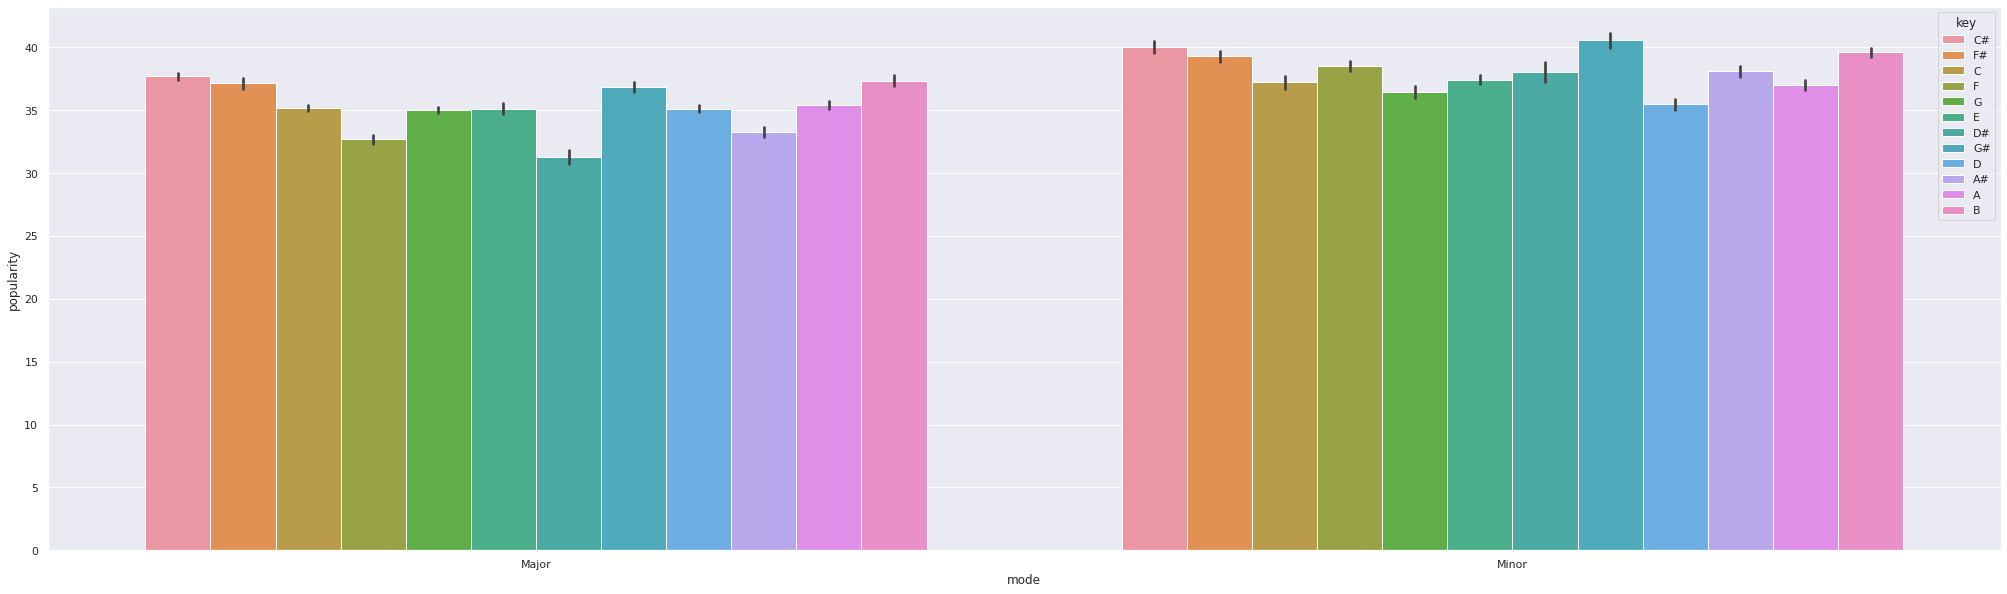

In [20]:
#The median popularity of each key divided into major and minor mode
key_mean = sns.barplot(x = 'mode', y = 'popularity', hue = 'key',data = spotify)
display(key_mean)


Overall the popularity of each key is around the same, but songs written in minor seem to be more popular than those in major.

#Predictive Analysis: Data Preperation

There are 4 categorical variables (genre,key, mode, and time signature) that need to be converted from text to numbers using dummy variables.

In [21]:
spotify = pd.get_dummies(spotify, columns=['genre'])
spotify = pd.get_dummies(spotify, columns=['key'])
spotify = pd.get_dummies(spotify, columns=['mode'])
spotify = pd.get_dummies(spotify, columns=['time_signature'])

In [22]:
#Modified dataset with dummy variables and modified popularity variable 
spotify.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,1.656217,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,2.289550,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,2.837783,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,2.540450,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,1.377083,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


Train Test Split (80% train, 20% test)

We will use a train test split of 80/20 and randomly split 80% of the data for the purpose of training our model and 20% of the data will be used for testing our model.

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

The Features (x variables) for the model is listed below. Our y variable will be popularity.

In [24]:
features = spotify.iloc[:,np.r_[4:58]]
features.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0.611,0.389,1.656217,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.246,0.590,2.289550,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,0.952,0.663,2.837783,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.703,0.240,2.540450,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.950,0.331,1.377083,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [25]:
#Dividing dataset in train(80% of dataset) and test(20% of the dataset)
X = features
y = spotify['popularity']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
112769,0.0348,0.522,3.509400,0.5920,0.000,0.3650,-2.982,0.0344,135.880,0.2560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
55205,0.4170,0.590,2.080883,0.6440,0.000,0.1900,-6.788,0.0755,100.024,0.4150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
220418,0.9580,0.141,7.742000,0.0842,0.941,0.0607,-27.521,0.0386,141.605,0.0304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
90906,0.3120,0.638,4.248217,0.9680,0.000,0.4010,-2.748,0.4790,85.801,0.6910,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
90650,0.3720,0.640,5.078883,0.5290,0.000,0.0782,-6.785,0.0893,128.101,0.1770,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y_train.head(5)

112769    67
55205     59
220418    27
90906     50
90650     59
Name: popularity, dtype: int64

For KNN we need to normalize the data before running it through the model.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_norm = min_max_scaler.transform(X_train)
X_valid_norm = min_max_scaler.transform(X_valid)

#Predictive Analysis: Testing Models

I will run multiple machine learning models and see which one can predict popularity the best.

In [26]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
#Linear Regression
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)
r2_score = LR_Model.score(X_valid,y_valid)
LR_Accuracy = r2_score
print("R^2: "+  str(LR_Accuracy))

R^2: 0.6472311536653964


In [ ]:
#Random Forest Regression
RFR_Model = RandomForestRegressor(random_state = 8)
RFR_Model.fit(X_train, y_train)
RFR_Accuracy = RFR_Model.score(X_valid, y_valid)
print("R^2: "+  str(RFR_Accuracy))

R^2: 0.6937686555330291


In [ ]:
KNN_Model = KNeighborsRegressor(random_state = 8)
KNN_Model.fit(X_train_norm, y_train)
KNN_Accuracy = KNN_Model.score(X_valid_norm, y_valid)
print("R^2: " + str(KNN_Accuracy))

R^2: 0.6254953553237426


In [ ]:
DT_Model = DecisionTreeRegressor(random_state = 8)
DT_Model.fit(X_train, y_train)
DT_Accuracy = DT_Model.score(X_valid, y_valid)
print("R^2: " + str(DT_Accuracy))

R^2: 0.3778511653940928


In [ ]:
XGB_Model = XGBRegressor(random_state = 8)
XGB_Model = XGB_Model.fit(X_train, y_train)
XGB_Accuracy = XGB_Model.score(X_valid, y_valid)
print("R^2:  " + str(XGB_Accuracy))

[23:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2:  0.6557990762235573


In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['Linear Regression', 
                                                      'Random Forest', 
                                                      'KNeighbors',
                                                      'Decision Tree',
                                                      'XGBoost'],
                                            'R^2': [LR_Accuracy,
                                                         RFR_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                          XGB_Accuracy ]})

In [ ]:
model_performance_accuracy.sort_values(by = "R^2", ascending = False)

,Model,R^2
1,Random Forest,0.693769
4,XGBoost,0.655799
0,Linear Regression,0.647231
2,KNeighbors,0.625495
3,Decision Tree,0.377851


Random Forest worked the best with r^2 of .6937

#Random Forest Model

Because Random Forest worked the best we will dive into the model by first determining if it is overfit. A model is overfit if the train accuracy is very high but the test accuracy is very low. If the model is overfit we will tune the parameters.



In [ ]:
#Test data Accuracy
print(RFR_Accuracy)

0.6937769200815319


In [ ]:
#Train data Accuracy
RFR_train_accuracy = RFR_Model.score(X_train, y_train)
print (RFR_train_accuracy)

0.956489351580564


As we see here, there is a rather large gap between the R^2 of the test data vs the train data. 

Note: The default in RandomForestRegressor is each tree uses all features at each node split max_features = n_features. So in order for a model to truly be Random Forest you must choose max_features < n_features.

In [ ]:
#Random Forest Regression with a lower number of max features
RFR_Model1 = RandomForestRegressor(max_features= 18,random_state = 8)
RFR_Model1.fit(X_train, y_train)
RFR_Accuracy1 = RFR_Model1.score(X_valid, y_valid)
print("R^2 for the test data is: "+  str(RFR_Accuracy1))

R^2 for the test data is: 0.6976802811025982


In [ ]:
#Train data Accuracy
RFR1_train_accuracy = RFR_Model1.score(X_train, y_train)
print (RFR1_train_accuracy)

0.9568900481945247


That somewhat helped with the overfitting problem. Now we will adjust the parameters for number of estimators,max depth,min samples leaf and min samples split.

In [27]:
#Random Forest Regression with a lower number of max features and more estimators and adjusting the max depth and min samples leaf and min samples split
RFR_Model2 = RandomForestRegressor(max_features= 18,n_estimators=500,max_depth=200,min_samples_leaf=200,min_samples_split = 50,random_state = 8)
RFR_Model2.fit(X_train, y_train)
RFR_Accuracy2 = RFR_Model2.score(X_valid, y_valid)
print("R^2 for the test data is: "+  str(RFR_Accuracy2))

R^2 for the test data is: 0.6752217942114027


In [28]:
#Train data Accuracy
RFR2_train_accuracy = RFR_Model2.score(X_train, y_train)
print (RFR2_train_accuracy)

0.6829106406619667


Although the test R^2 value went down slightly. There is no longer a problem with overfitting.

Now, we will look into the feature importance for the pruned model.

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,16))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

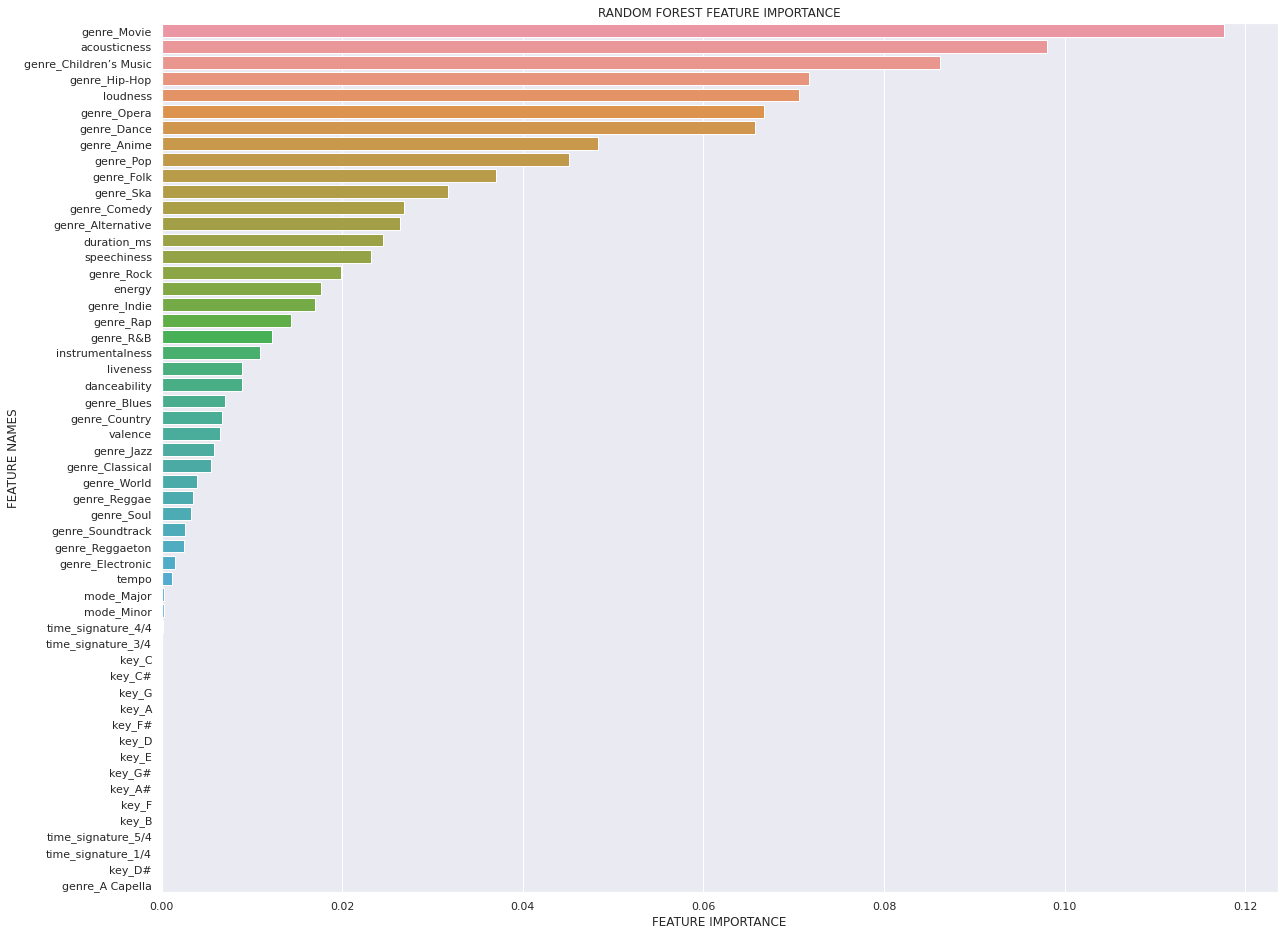

In [ ]:
plot_feature_importance(RFR_Model2.feature_importances_,X_train.columns,'RANDOM FOREST ')

The features that have the most importance in the model and for predicting popularity is some of the genre dummy variables and some numerical variables such as acousticness and loudness. The ones with the least importance are the mode,key and time signature variables. It should be noted that the feature that had the least amount of importance is the dummy variable for the A Capella genre. This could be because not many songs in the dataset were A Capella.